<a href="https://colab.research.google.com/github/staufferkn/Course_Python_for_Data_Analysis/blob/main/Chapter9_Plotting_and_Visualisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#9.1 A Brief matplotlib API Primer

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data = np.arange(10)

In [ ]:
data

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

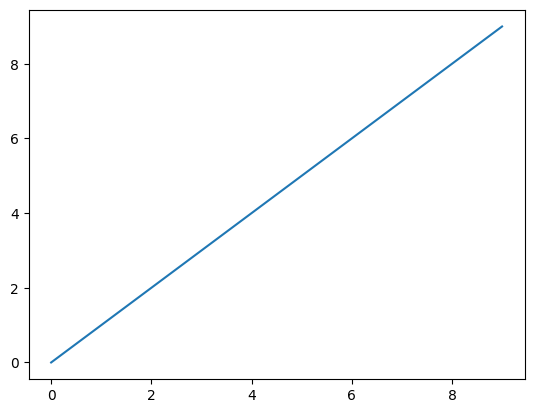

In [ ]:
plt.plot(data)

In [ ]:
#Figures and Subplots

#Plots in matplotlib reside within a Figure object. You can create a new figure with plt.figure:

In [ ]:
fig = plt.figure()

<Figure size 640x480 with 0 Axes>

In [ ]:
#plt.figure has a number of options; notably, figsize will guarantee the figure has a
#certain size and aspect ratio if saved to disk.
#You can’t make a plot with a blank figure. You have to create one or more subplots using add_subplot:

In [ ]:
ax1 = fig.add_subplot(2, 2, 1)

In [ ]:
#This means that the figure should be 2 × 2 (so up to four plots in total), and we’re
#selecting the first of four subplots (numbered from 1). If you create the next two
#subplots, you’ll end up with a visualization that looks like:

#One nuance of using Jupyter notebooks is that plots are reset after
#each cell is evaluated, so you must put all of the plotting commands
#in a single notebook cell.

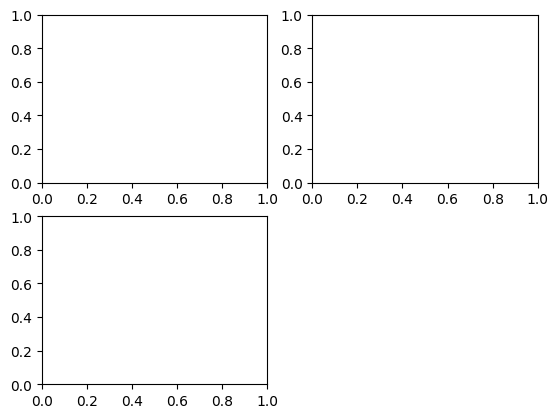

In [ ]:
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)

In [ ]:
#These plot axis objects have various methods that create different types of plots,
#and it is preferred to use the axis methods over the top-level plotting functions
#like plt.plot. For example, we could make a line plot with the plot method

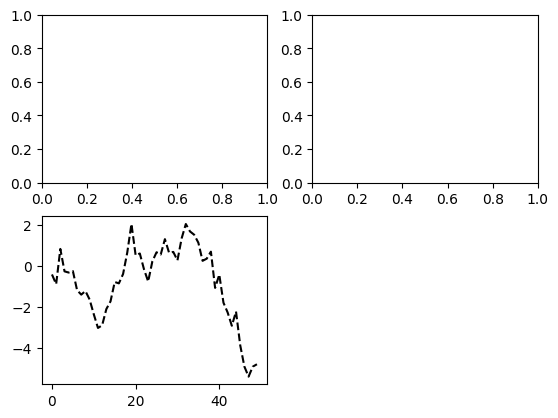

In [ ]:

fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax3.plot(np.random.standard_normal(50).cumsum(), color="black", linestyle="dashed")

In [ ]:
#The additional options instruct matplotlib to plot a black dashed line. The objects
#returned by fig.add_subplot here are AxesSubplot objects, on which you can
#directly plot on the other empty subplots by calling each one’s instance method

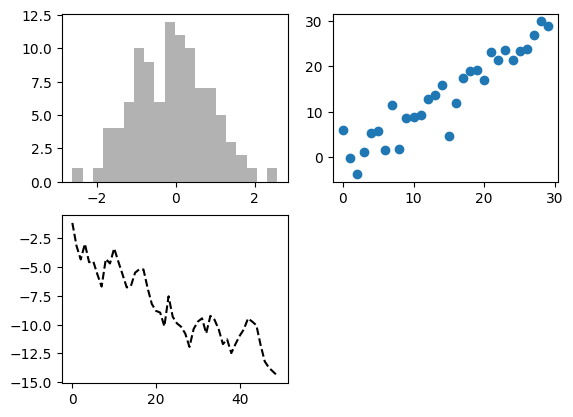

In [ ]:
fig = plt.figure()

ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)

ax3.plot(np.random.standard_normal(50).cumsum(), color="black", linestyle="dashed");
ax1.hist(np.random.standard_normal(100), bins=20, color="black", alpha=0.3);
ax2.scatter(np.arange(30), np.arange(30) + 3 * np.random.standard_normal(30));

In [ ]:
#To make creating a grid of subplots more convenient, matplotlib includes a plt.sub
#plots method that creates a new figure and returns a NumPy array containing the
#created subplot objects:

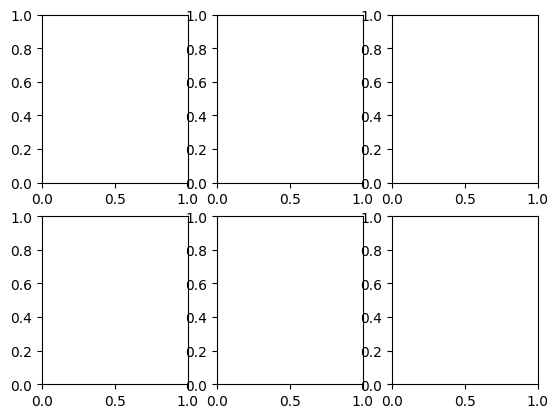

In [ ]:
fig, axes = plt.subplots(2, 3)

In [ ]:
axes

array([[<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >]], dtype=object)

In [ ]:
#The axes array can then be indexed like a two-dimensional array; for example,
#axes[0, 1] refers to the subplot in the top row at the center. You can also indi‐
#cate that subplots should have the same x- or y-axis using sharex and sharey,
#respectively. This can be useful when you’re comparing data on the same scale;
#otherwise, matplotlib autoscales plot limits independently.

In [ ]:
#Adjusting the spacing around subplots

#By default, matplotlib leaves a certain amount of padding around the outside of the
#subplots and in spacing between subplots. This spacing is all specified relative to the
#height and width of the plot, so that if you resize the plot either programmatically
#or manually using the GUI window, the plot will dynamically adjust itself. You can
#change the spacing using the subplots_adjust method on Figure objects:

#subplots_adjust(left=None, bottom=None, right=None, top=None,
# wspace=None, hspace=None)

#wspace and hspace control the percent of the figure width and figure height, respectively, to use as spacing between subplots. Here is a small example you can execute in
#Jupyter where I shrink the spacing all the way to zero

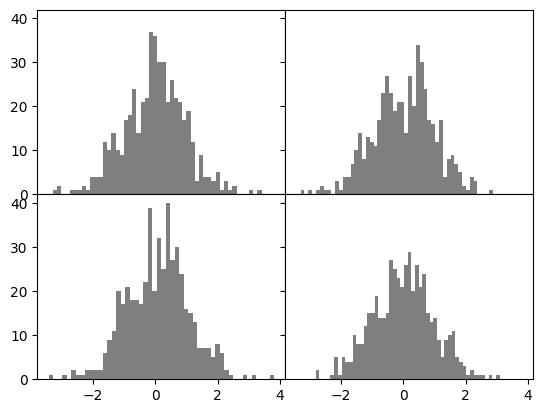

In [ ]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)

for i in range(2):
    for j in range(2):
        axes[i, j].hist(np.random.standard_normal(500), bins=50, color="black", alpha=0.5)

fig.subplots_adjust(wspace=0, hspace=0)

In [ ]:
#You may notice that the axis labels overlap. matplotlib doesn’t check whether the
#labels overlap, so in a case like this you would need to fix the labels yourself by
#specifying explicit tick locations and tick labels (we’ll look at how to do this in the
#later section

In [ ]:
#Colors, Markers, and Line Styles

#matplotlib’s line plot function accepts arrays of x and y coordinates and optional
#color styling options. For example, to plot x versus y with green dashes, you would execute:

#ax.plot(x, y, linestyle="--", color="green")

#A number of color names are provided for commonly used colors, but you can use
#any color on the spectrum by specifying its hex code (e.g., "#CECECE"). You can
#see some of the supported line styles by looking at the docstring for plt.plot (use
#plt.plot? in IPython or Jupyter). A more comprehensive reference is available in the
#online documentation.
#Line plots can additionally have markers to highlight the actual data points. Since
#matplotlib’s plot function creates a continuous line plot, interpolating between
#points, it can occasionally be unclear where the points lie. The marker can be
#supplied as an additional styling option

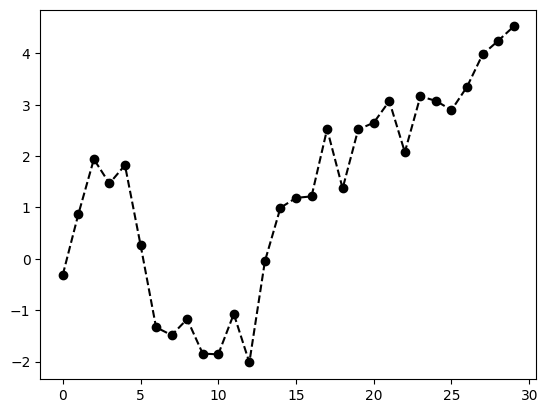

In [ ]:

fig = plt.figure()
ax = fig.add_subplot()
ax.plot(np.random.standard_normal(30).cumsum(), color="black", linestyle="dashed", marker="o");

In [ ]:
#For line plots, you will notice that subsequent points are linearly interpolated by
#default. This can be altered with the drawstyle option

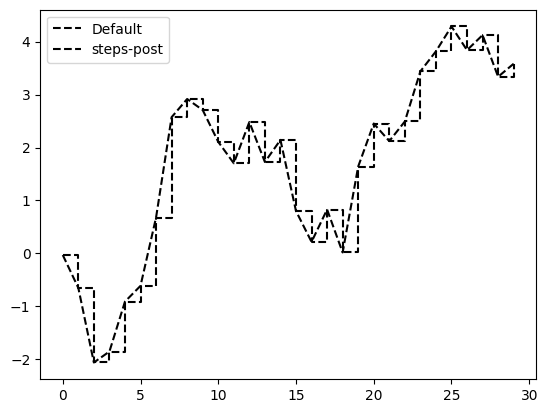

In [ ]:
fig = plt.figure()
ax = fig.add_subplot()
data = np.random.standard_normal(30).cumsum()
ax.plot(data, color="black", linestyle="dashed", label="Default");
ax.plot(data, color="black", linestyle="dashed", drawstyle="steps-post", label="steps-post");
ax.legend()

In [ ]:
#You must call ax.legend to create the legend, whether or not you
#passed the label options when plotting the data.

In [ ]:
#Ticks, Labels, and Legends

#Most kinds of plot decorations can be accessed through methods on matplotlib axes
#objects. This includes methods like xlim, xticks, and xticklabels. These control the
#plot range, tick locations, and tick labels, respectively. They can be used in two ways:

#• Called with no arguments returns the current parameter value (e.g., ax.xlim()
#returns the current x-axis plotting range)
#• Called with parameters sets the parameter value (e.g., ax.xlim([0, 10]) sets the
#x-axis range to 0 to 10)

#All such methods act on the active or most recently created AxesSubplot. Each
#corresponds to two methods on the subplot object itself; in the case of xlim, these are
#ax.get_xlim and ax.set_xlim.

In [ ]:
#Setting the title, axis labels, ticks, and tick labels

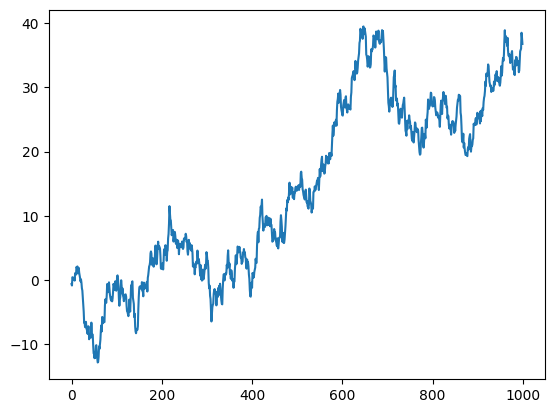

In [ ]:
fig, ax = plt.subplots()
ax.plot(np.random.standard_normal(1000).cumsum());

In [ ]:
#To change the x-axis ticks, it’s easiest to use set_xticks and set_xticklabels. The
#former instructs matplotlib where to place the ticks along the data range; by default
#these locations will also be the labels. But we can set any other values as the labels
#using set_xticklabels

#The rotation option sets the x tick labels at a 30-degree rotation. Lastly, set_xlabel
#gives a name to the x-axis, and set_title is the subplot title (see Figure 9-9 for the
#resulting figure)

Text(0.5, 1.0, 'My first matplotlib plot')

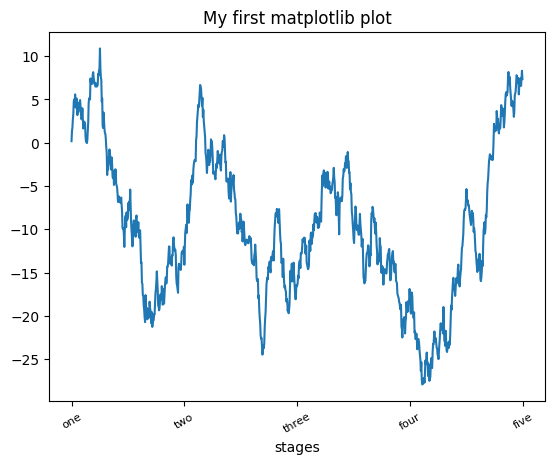

In [ ]:
fig, ax = plt.subplots()
ax.plot(np.random.standard_normal(1000).cumsum());
ticks = ax.set_xticks([0, 250, 500, 750, 1000])
labels = ax.set_xticklabels(["one", "two", "three", "four", "five"], rotation=30, fontsize=8)
ax.set_xlabel("stages")
ax.set_title("My first matplotlib plot")

In [ ]:
#Modifying the y-axis consists of the same process, substituting y for x in this example.
#The axes class has a set method that allows batch setting of plot properties. From the
#prior example, we could also have written:

#ax.set(title="My first matplotlib plot", xlabel="Stages")

In [ ]:
#Adding Legends

#Legends are another critical element for identifying plot elements. There are a couple
#of ways to add one. The easiest is to pass the label argument when adding each piece
#of the plot:

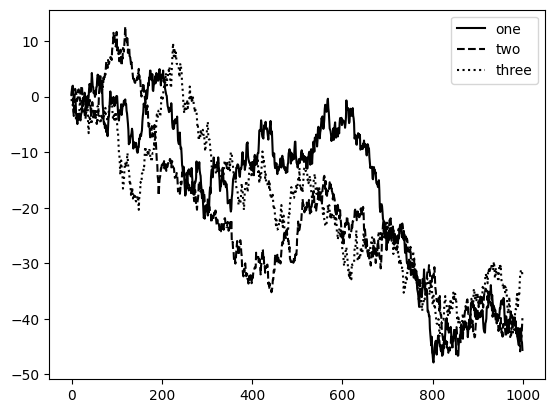

In [ ]:
fig, ax = plt.subplots()

ax.plot(np.random.randn(1000).cumsum(), color="black", label="one");
ax.plot(np.random.randn(1000).cumsum(), color="black", linestyle="dashed", label="two");
ax.plot(np.random.randn(1000).cumsum(), color="black", linestyle="dotted", label="three");
ax.legend()

In [ ]:
#Annotations and Drawing on a Subplot

#In addition to the standard plot types, you may wish to draw your own plot annotations, which could consist of text, arrows, or other shapes. You can add annotations
#and text using the text, arrow, and annotate functions. text draws text at given
#coordinates (x, y) on the plot with optional custom styling:

#ax.text(x, y, "Hello world!",
# family="monospace", fontsize=10)

#Annotations can draw both text and arrows arranged appropriately. As an example,
#let’s plot the closing S&P 500 index price since 2007 (obtained from Yahoo! Finance)
#and annotate it with some of the important dates from the 2008–2009 financial crisis.
#You can run this code example in a single cell in a Jupyter notebook. See Figure 9-11
#for the result:

In [ ]:
from datetime import datetime

Text(0.5, 1.0, 'Important dates in the 2008-2009 financial crisis')

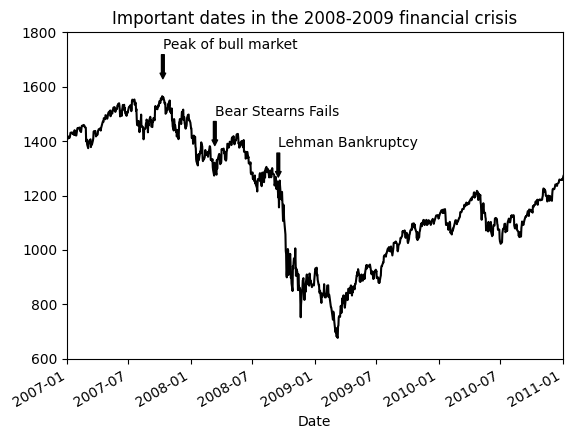

In [ ]:
fig, ax = plt.subplots()

data = pd.read_csv("https://raw.githubusercontent.com/wesm/pydata-book/a892791ce5a3831134cfa2989033ecbb9289f1ea/examples/spx.csv", index_col=0, parse_dates=True)
spx = data["SPX"]

spx.plot(ax=ax, color="black")

crisis_data = [
    (datetime(2007, 10, 11), "Peak of bull market"),
    (datetime(2008, 3, 12), "Bear Stearns Fails"),
    (datetime(2008, 9, 15), "Lehman Bankruptcy")
]

for date, label in crisis_data:
    ax.annotate(label, xy=(date, spx.asof(date) + 75),
        xytext=(date, spx.asof(date) + 225),
        arrowprops=dict(facecolor="black", headwidth=4, width=2, headlength=4),
        horizontalalignment="left", verticalalignment="top")

#Zoom in on 2007 - 2010
ax.set_xlim(["1/1/2007", "1/1/2011"])
ax.set_ylim([600, 1800])

ax.set_title("Important dates in the 2008-2009 financial crisis")

In [ ]:
#There are a couple of important points to highlight in this plot. The ax.annotate
#method can draw labels at the indicated x and y coordinates. We use the set_xlim
#and set_ylim methods to manually set the start and end boundaries for the plot
#rather than using matplotlib’s default. Lastly, ax.set_title adds a main title to the plot.

In [ ]:
#Drawing shapes requires some more care. matplotlib has objects that represent many
#common shapes, referred to as patches. Some of these, like Rectangle and Circle, are
#found in matplotlib.pyplot, but the full set is located in matplotlib.patches.

#To add a shape to a plot, you create the patch object and add it to a subplot ax by
#passing the patch to ax.add_patch (see

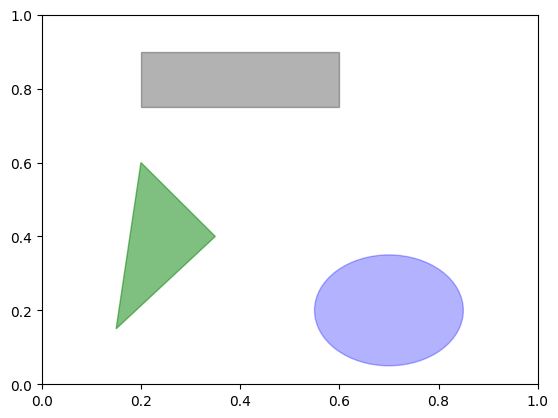

In [ ]:
fig, ax = plt.subplots()

rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color="black", alpha=0.3)
circ = plt.Circle((0.7, 0.2), 0.15, color="blue", alpha=0.3)
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]], color="green", alpha=0.5)

ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)

In [ ]:
#Saving Plots to File

#You can save the active figure to file using the figure object’s savefig instance
#method. For example, to save an SVG version of a figure, you need only type:

 #fig.savefig("figpath.svg")

#The file type is inferred from the file extension. So if you used .pdf instead, you
#would get a PDF. One important option that I use frequently for publishing graphics
#is dpi, which controls the dots-per-inch resolution. To get the same plot as a PNG at
#400 DPI, you would do:

 #fig.savefig("figpath.png", dpi=400)

In [ ]:
#Matplotlib Configuration

#matplotlib comes configured with color schemes and defaults that are geared primarily toward preparing figures for publication. Fortunately, nearly all of the default
#behavior can be customized via global parameters governing figure size, subplot
#spacing, colors, font sizes, grid styles, and so on. One way to modify the configuration
#programmatically from Python is to use the rc method; for example, to set the global
#default figure size to be 10 × 10, you could enter:

 #plt.rc("figure", figsize=(10, 10))

#All of the current configuration settings are found in the plt.rcParams dictionary,
#and they can be restored to their default values by calling the plt.rcdefaults() function.
#The first argument to rc is the component you wish to customize, such as "figure",
#"axes", "xtick", "ytick", "grid", "legend", or many others. After that can follow a
#sequence of keyword arguments indicating the new parameters. A convenient way to
#write down the options in your program is as a dictionary:

 #plt.rc("font", family="monospace", weight="bold", size=8)

#For more extensive customization and to see a list of all the options, matplotlib
#comes with a configuration file matplotlibrc in the matplotlib/mpl-data directory. If
#you customize this file and place it in your home directory titled .matplotlibrc, it will
#be loaded each time you use matplotlib.

In [ ]:
#9.2 Plotting with pandas and seaborn

#matplotlib can be a fairly low-level tool. You assemble a plot from its base components: the data display (i.e., the type of plot: line, bar, box, scatter, contour, etc.),
#legend, title, tick labels, and other annotations.
#In pandas, we may have multiple columns of data, along with row and column labels.
#pandas itself has built-in methods that simplify creating visualizations from Data‐
#Frame and Series objects. Another library is seaborn, a high-level statistical graphics
#library built on matplotlib. seaborn simplifies creating many common visualization types.

In [ ]:
#Line Plots

#Series and DataFrame have a plot attribute for making some basic plot types. By
#default, plot() makes line plots

<Axes: >

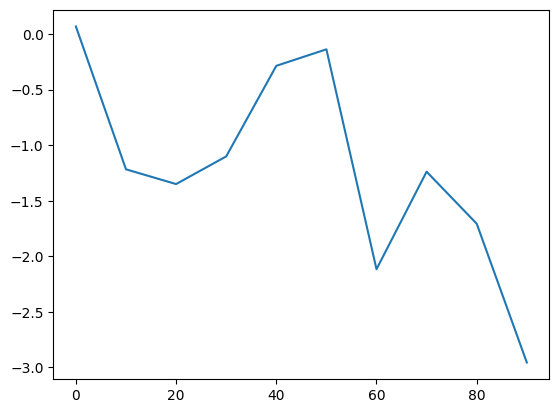

In [ ]:
s = pd.Series(np.random.standard_normal(10).cumsum(), index=np.arange(0, 100, 10))
s.plot()

In [ ]:
#The Series object’s index is passed to matplotlib for plotting on the x-axis, though
#you can disable this by passing use_index=False. The x-axis ticks and limits can be
#adjusted with the xticks and xlim options, and the y-axis respectively with yticks and ylim

#Most of pandas’s plotting methods accept an optional ax parameter, which can be a
#matplotlib subplot object. This gives you more flexible placement of subplots in a grid layout.

#DataFrame’s plot method plots each of its columns as a different line on the same
#subplot, creating a legend automatically

In [ ]:
df = pd.DataFrame(np.random.standard_normal((10, 4)).cumsum(0), columns=["A", "B", "C", "D"], index=np.arange(0, 100, 10))

In [ ]:
plt.style.use("grayscale")

<Axes: >

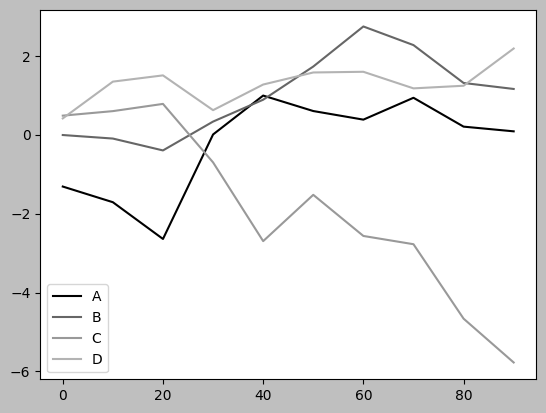

In [ ]:
df.plot()

In [ ]:
#Bar Plots

#The plot.bar() and plot.barh() make vertical and horizontal bar plots, respectively. In this case, the Series or DataFrame index will be used as the x (bar) or y (barh) ticks

<Axes: >

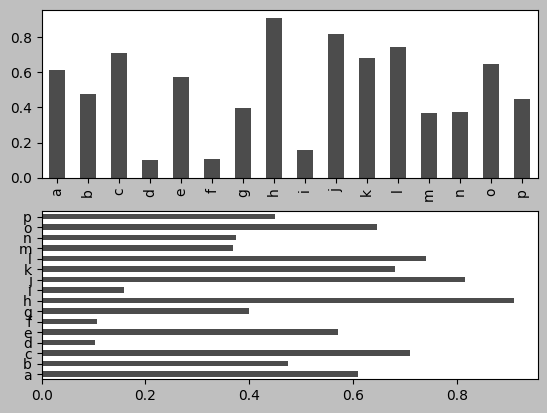

In [ ]:
fig, axes = plt.subplots(2, 1)

data = pd.Series(np.random.uniform(size=16), index=list("abcdefghijklmnop"))
data.plot.bar(ax=axes[0], color ="black", alpha=0.7)
data.plot.barh(ax=axes[1], color="black", alpha=0.7)

In [ ]:
#With a DataFrame, bar plots group the values in each row in bars, side by side, for each value.

In [ ]:
df = pd.DataFrame(np.random.uniform(size=(6, 4)), index=["one", "two", "three", "four", "five", "six"], columns=pd.Index(["A", "B", "C", "D"], name="Genus"))

In [ ]:
df

Genus,A,B,C,D
one,0.658572,0.760044,0.802055,0.954020
two,0.269922,0.674919,0.935571,0.816399
three,0.183287,0.728005,0.257641,0.685267
four,0.360752,0.594321,0.957021,0.155341
five,0.813692,0.520738,0.632566,0.269193
six,0.737436,0.734332,0.157307,0.853949


<Axes: >

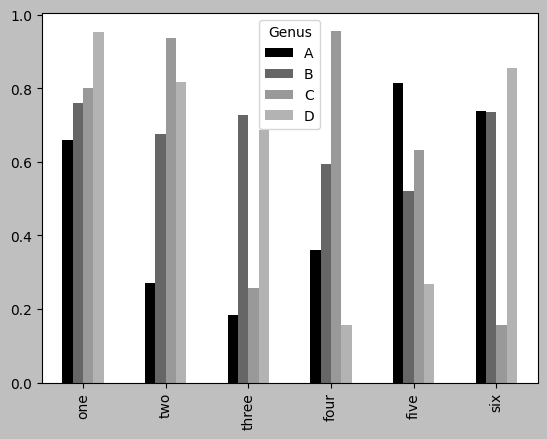

In [ ]:
df.plot.bar()

In [ ]:
#We create stacked bar plots from a DataFrame by passing stacked=True, resulting in
#the value in each row being stacked together horizontally

<Axes: >

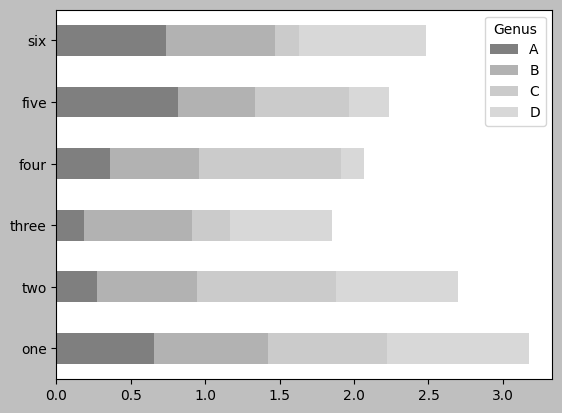

In [ ]:
df.plot.barh(stacked=True, alpha=0.5)

In [ ]:
#A useful recipe for bar plots is to visualize a Series’s value frequency
#using value_counts: s.value_counts().plot.bar().

In [ ]:
#Let’s have a look at an example dataset about restaurant tipping. Suppose we wanted
#to make a stacked bar plot showing the percentage of data points for each party size
#for each day. I load the data using read_csv and make a cross-tabulation by day and
#party size. The pandas.crosstab function is a convenient way to compute a simple
#frequency table from two DataFrame columns:

In [ ]:
link = "https://raw.githubusercontent.com/wesm/pydata-book/a892791ce5a3831134cfa2989033ecbb9289f1ea/examples/tips.csv"

tips = pd.read_csv(link)

In [ ]:
tips.head()

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


In [ ]:
party_counts = pd.crosstab(tips["day"], tips["size"])

In [ ]:
party_counts = party_counts.reindex(index=["Thur", "Fri", "Sat", "Sun"])

In [ ]:
party_counts

size,1,2,3,4,5,6
day,,,,,,
Thur,1,48,4,5,1,3
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1


In [ ]:
#Since there are not many one- and six-person parties, I remove them here:

In [ ]:
party_counts = party_counts.loc[:, 2:5]

In [ ]:
#Then, normalize so that each row sums to 1, and make the plot

In [ ]:
#Normalise to sum to 1

party_pcts = party_counts.div(party_counts.sum(axis="columns"), axis="index")

In [ ]:
party_pcts

size,2,3,4,5
day,,,,
Thur,0.827586,0.068966,0.086207,0.017241
Fri,0.888889,0.055556,0.055556,0.000000
Sat,0.623529,0.211765,0.152941,0.011765
Sun,0.520000,0.200000,0.240000,0.040000


<Axes: xlabel='day'>

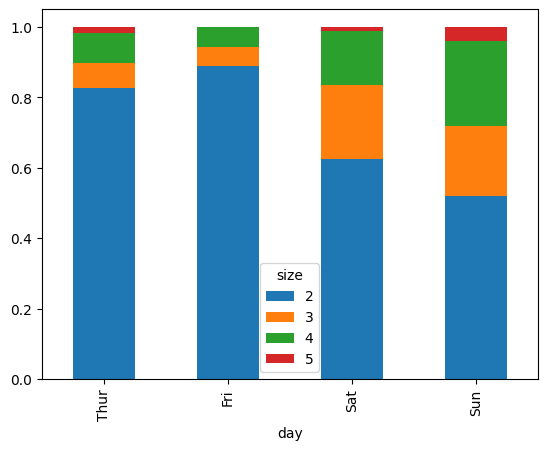

In [ ]:
party_pcts.plot.bar(stacked=True)

In [ ]:
#So you can see that party sizes appear to increase on the weekend in this dataset.

#With data that requires aggregation or summarization before making a plot, using the
#seaborn package can make things much simpler
#Let’s look now at the tipping percentage by day with seaborn

In [ ]:
import seaborn as sns

In [ ]:
tips["tip_pct"] = tips["tip"] / (tips["total_bill"] - tips["tip"])

In [ ]:
tips.head()

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.063204
1,10.34,1.66,No,Sun,Dinner,3,0.191244
2,21.01,3.50,No,Sun,Dinner,3,0.199886
3,23.68,3.31,No,Sun,Dinner,2,0.162494
4,24.59,3.61,No,Sun,Dinner,4,0.172069


<Axes: xlabel='tip_pct', ylabel='day'>

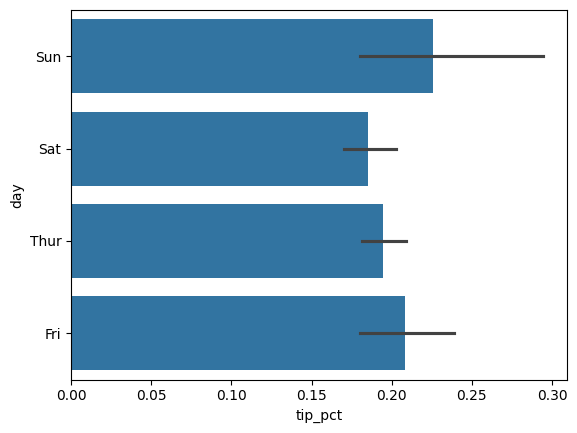

In [ ]:
sns.barplot(x="tip_pct", y="day", data=tips, orient="h")

In [ ]:
#Plotting functions in seaborn take a data argument, which can be a pandas DataFrame. The other arguments refer to column names. Because there are multiple
#observations for each value in the day, the bars are the average value of tip_pct.
#The black lines drawn on the bars represent the 95% confidence interval (this can be
#configured through optional arguments).

<Axes: xlabel='tip_pct', ylabel='day'>

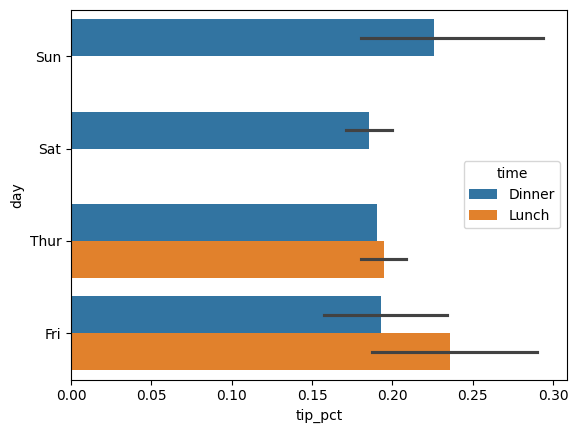

In [ ]:
sns.barplot(x="tip_pct", y="day", hue="time", data=tips, orient="h")

In [ ]:
#Notice that seaborn has automatically changed the aesthetics of plots: the default
#color palette, plot background, and grid line colors. You can switch between different
#plot appearances using seaborn.set_style:

sns.set_style("whitegrid")

In [ ]:
#When producing plots for black-and-white print medium, you may find it useful to
#set a greyscale color palette, like so:

sns.set_palette("Greys_r")

In [ ]:
#Histograms and Density Plots

#A histogram is a kind of bar plot that gives a discretized display of value frequency.
#The data points are split into discrete, evenly spaced bins, and the number of data
#points in each bin is plotted. Using the tipping data from before, we can make a
#histogram of tip percentages of the total bill using the plot.hist method on the Series

<Axes: ylabel='Frequency'>

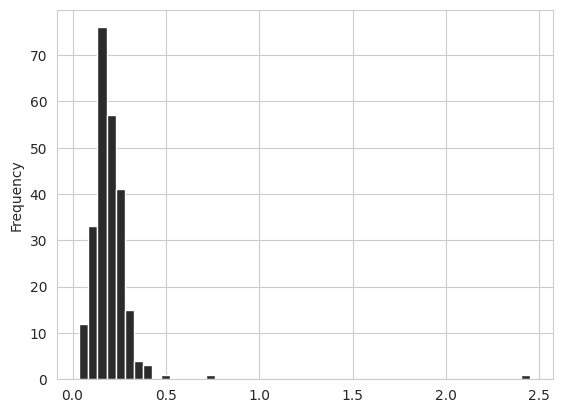

In [ ]:
tips["tip_pct"].plot.hist(bins=50)

In [ ]:
#A related plot type is a density plot, which is formed by computing an estimate of a
#continuous probability distribution that might have generated the observed data. The
#usual procedure is to approximate this distribution as a mixture of “kernels”—that is,
#simpler distributions like the normal distribution. Thus, density plots are also known
#as kernel density estimate (KDE) plots. Using plot.density makes a density plot
#using the conventional mixture-of-normals estimate

<Axes: ylabel='Density'>

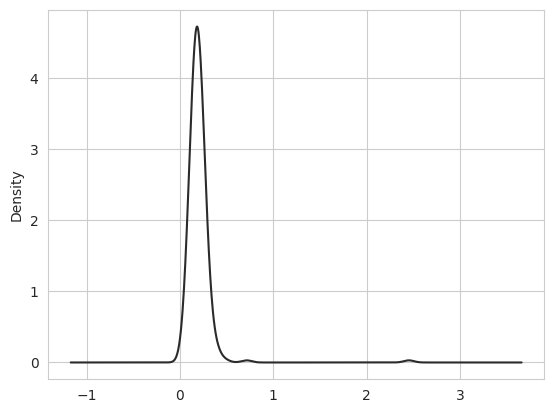

In [ ]:
tips["tip_pct"].plot.density()

In [ ]:
#seaborn makes histograms and density plots even easier through its histplot
#method, which can plot both a histogram and a continuous density estimate simultaneously. As an example, consider a bimodal distribution consisting of draws from
#two different standard normal distributions

In [ ]:
comp1 = np.random.standard_normal(200)

In [ ]:
comp2 = 10 + 2 * np.random.standard_normal(200)

In [ ]:
values = pd.Series(np.concatenate([comp1, comp2]))

<Axes: ylabel='Count'>

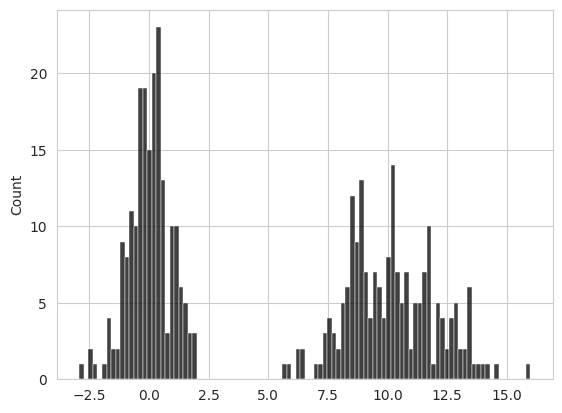

In [ ]:
sns.histplot(values, bins=100, color="black")

In [ ]:
#Scatter or Point Plots

#Point plots or scatter plots can be a useful way of examining the relationship between
#two one-dimensional data series. For example, here we load the macrodata dataset
#from the statsmodels project, select a few variables, then compute log differences:

In [ ]:
link = "https://raw.githubusercontent.com/wesm/pydata-book/a892791ce5a3831134cfa2989033ecbb9289f1ea/examples/macrodata.csv"

In [ ]:
macro = pd.read_csv(link)

In [ ]:
data = macro[["cpi", "m1", "tbilrate", "unemp"]]

In [ ]:
trans_data = np.log(data).diff().dropna()

In [ ]:
trans_data.tail()

,cpi,m1,tbilrate,unemp
198,-0.007904,0.045361,-0.396881,0.105361
199,-0.021979,0.066753,-2.277267,0.139762
200,0.002340,0.010286,0.606136,0.160343
201,0.008419,0.037461,-0.200671,0.127339
202,0.008894,0.012202,-0.405465,0.042560


<Axes: xlabel='tip_pct', ylabel='day'>

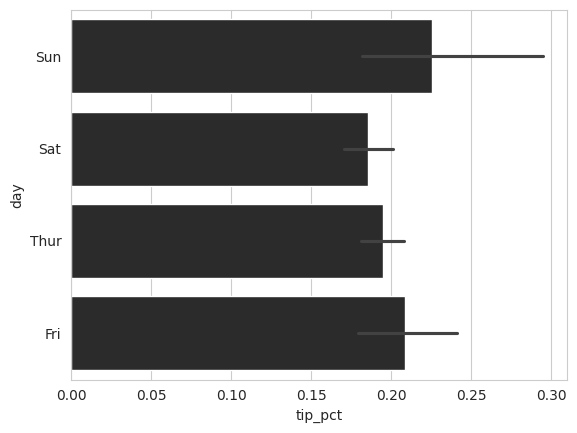

In [ ]:
sns.barplot(x="tip_pct", y="day", data=tips, orient="h")

In [ ]:
#Plotting functions in seaborn take a data argument, which can be a pandas DataFrame. The other arguments refer to column names. Because there are multiple
#observations for each value in the day, the bars are the average value of tip_pct.
#The black lines drawn on the bars represent the 95% confidence interval (this can be
#configured through optional arguments).
#seaborn.barplot has a hue option that enables us to split by an additional categorical value

<Axes: xlabel='tip_pct', ylabel='day'>

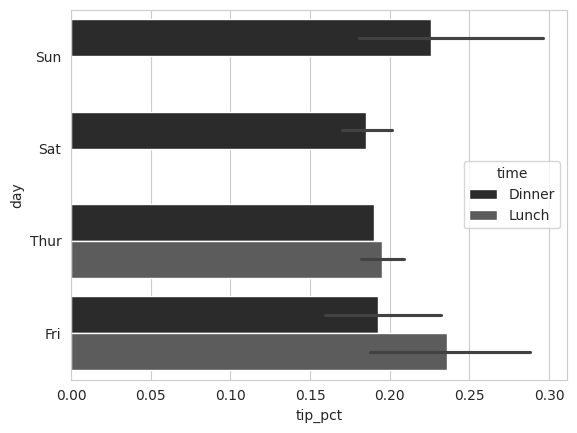

In [ ]:
sns.barplot(x="tip_pct", y="day", hue="time", data=tips, orient="h")

In [ ]:
#Notice that seaborn has automatically changed the aesthetics of plots: the default
#color palette, plot background, and grid line colors. You can switch between different
#plot appearances using seaborn.set_style:

In [ ]:
sns.set_style("whitegrid")

In [ ]:
#When producing plots for black-and-white print medium, you may find it useful to
#set a greyscale color palette, like so:

In [ ]:
sns.set_palette("Greys_r")

In [ ]:
#Histograms and Density Plots

#A histogram is a kind of bar plot that gives a discretized display of value frequency.
#The data points are split into discrete, evenly spaced bins, and the number of data
#points in each bin is plotted. Using the tipping data from before, we can make a
#histogram of tip percentages of the total bill using the plot.hist method on the Series

<Axes: ylabel='Frequency'>

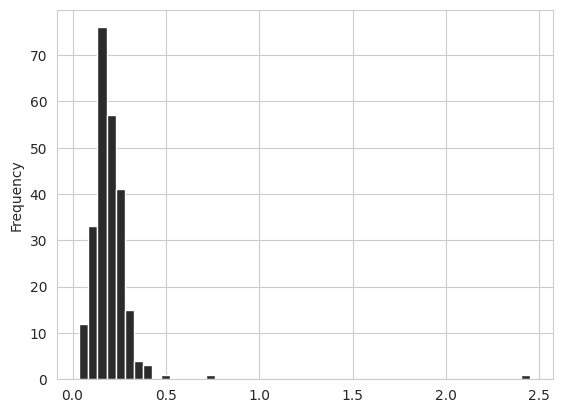

In [ ]:
tips["tip_pct"].plot.hist(bins=50)

In [ ]:
#A related plot type is a density plot, which is formed by computing an estimate of a
#continuous probability distribution that might have generated the observed data. The
#usual procedure is to approximate this distribution as a mixture of “kernels”—that is,
#simpler distributions like the normal distribution. Thus, density plots are also known
#as kernel density estimate (KDE) plots. Using plot.density makes a density plot
#using the conventional mixture-of-normals estimate

<Axes: ylabel='Density'>

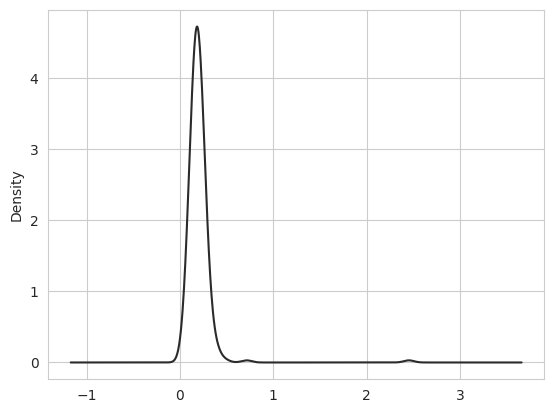

In [ ]:
tips["tip_pct"].plot.density()

In [ ]:
#This kind of plot requires SciPy, so if you do not have it installed already, you can
#pause and do that now:

 #conda install scipy

#seaborn makes histograms and density plots even easier through its histplot
#method, which can plot both a histogram and a continuous density estimate simultaneously. As an example, consider a bimodal distribution consisting of draws from
#two different standard normal distributions

In [ ]:
comp1 = np.random.standard_normal(200)

In [ ]:
comp2 = 10 + 2 * np.random.standard_normal(200)

In [ ]:
values = pd.Series(np.concatenate([comp1, comp2]))

<Axes: ylabel='Count'>

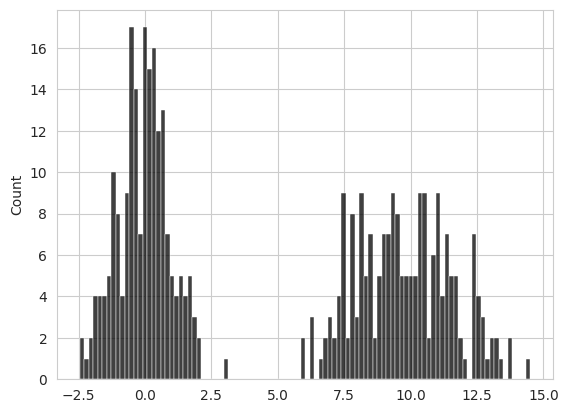

In [ ]:
sns.histplot(values, bins=100, color="black")

In [ ]:
#Scatter or Point Plots

#Point plots or scatter plots can be a useful way of examining the relationship between
#two one-dimensional data series. For example, here we load the macrodata dataset
#from the statsmodels project, select a few variables, then compute log differences:

In [ ]:
macro = pd.read_csv("https://raw.githubusercontent.com/wesm/pydata-book/a892791ce5a3831134cfa2989033ecbb9289f1ea/examples/macrodata.csv")

In [52]:
data = macro[["cpi", "m1", "tbilrate", "unemp"]]

In [53]:
trans_data = np.log(data).diff().dropna()

In [54]:
trans_data.tail()

,cpi,m1,tbilrate,unemp
198,-0.007904,0.045361,-0.396881,0.105361
199,-0.021979,0.066753,-2.277267,0.139762
200,0.002340,0.010286,0.606136,0.160343
201,0.008419,0.037461,-0.200671,0.127339
202,0.008894,0.012202,-0.405465,0.042560


In [55]:
#We can then use seaborn’s regplot method, which makes a scatter plot and fits a
#linear regression line (see

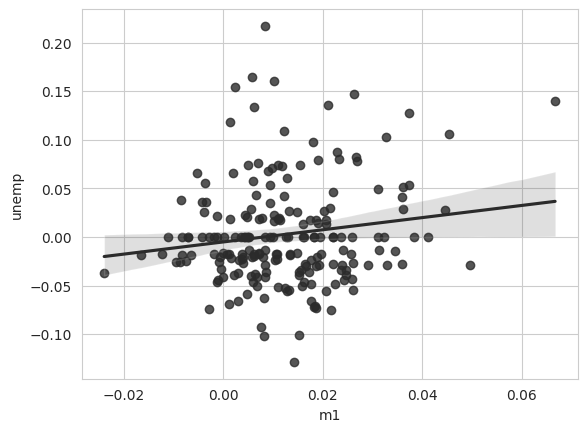

In [56]:
ax = sns.regplot(x="m1", y="unemp", data=trans_data)

In [57]:
#In exploratory data analysis, it’s helpful to be able to look at all the scatter plots
#among a group of variables; this is known as a pairs plot or scatter plot matrix. Making such a plot from scratch is a bit of work, so seaborn has a convenient pairplot
#function that supports placing histograms or density estimates of each variable along
#the diagonal

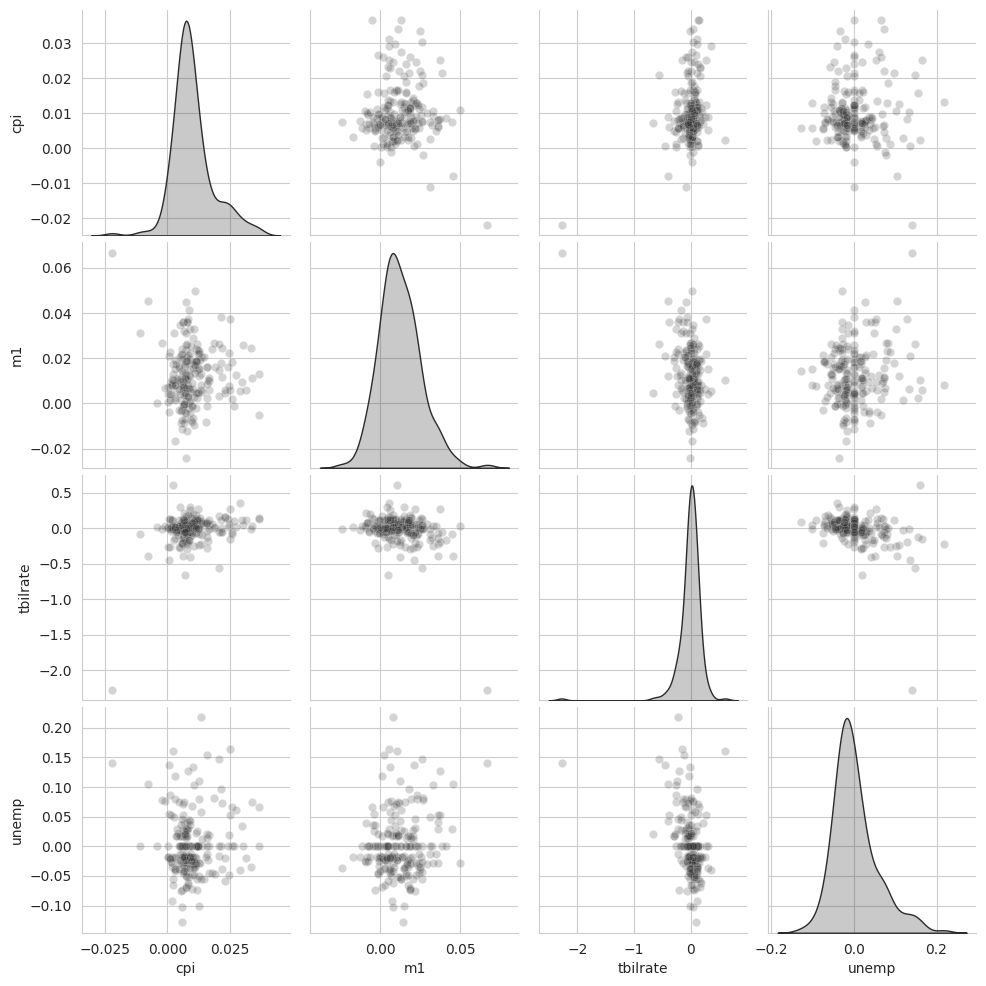

In [59]:
sns.pairplot(trans_data, diag_kind="kde", plot_kws={"alpha" : 0.2})

In [60]:
#You may notice the plot_kws argument. This enables us to pass down configuration
#options to the individual plotting calls on the off-diagonal elements. Check out the
#seaborn.pairplot docstring for more granular configuration options.

In [62]:
#Facet Grids and Categorical Data

#What about datasets where we have additional grouping dimensions? One way to
#visualize data with many categorical variables is to use a facet grid, which is a twodimensional layout of plots where the data is split across the plots on each axis based
#on the distinct values of a certain variable. seaborn has a useful built-in function cat
#plot that simplifies making many kinds of faceted plots split by categorical variables

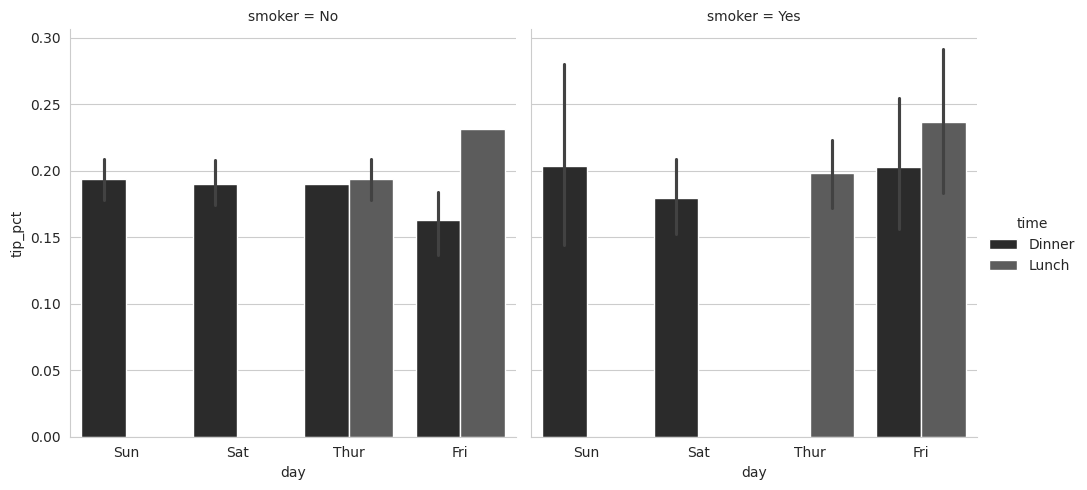

In [63]:
sns.catplot(x="day", y="tip_pct", hue="time", col="smoker", kind="bar", data=tips[tips.tip_pct < 1])

In [64]:
#Instead of grouping by "time" by different bar colors within a facet, we can also
#expand the facet grid by adding one row per time value

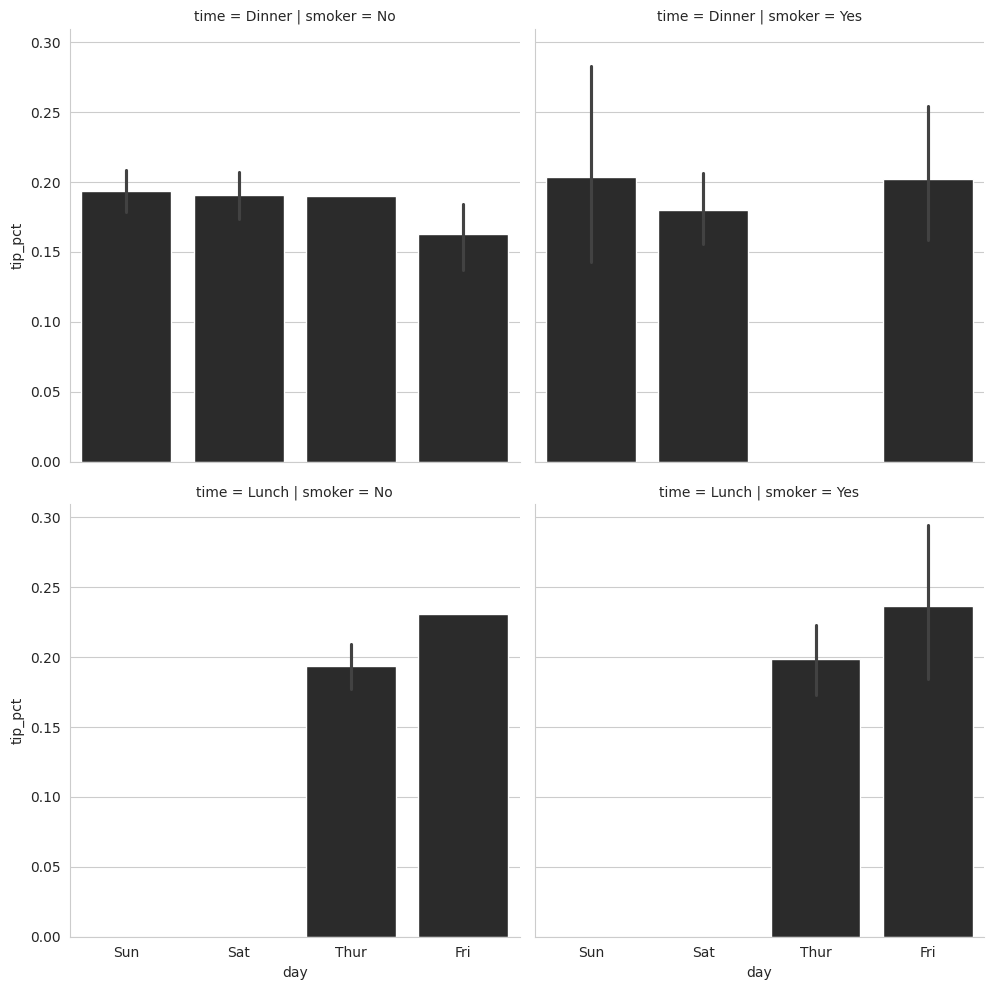

In [66]:
sns.catplot(x="day", y="tip_pct", row="time",
 .....: col="smoker",
 .....: kind="bar", data=tips[tips.tip_pct < 1])

In [67]:
#catplot supports other plot types that may be useful depending on what you are
#trying to display. For example, box plots (which show the median, quartiles, and outliers) can be an effective visualization type (

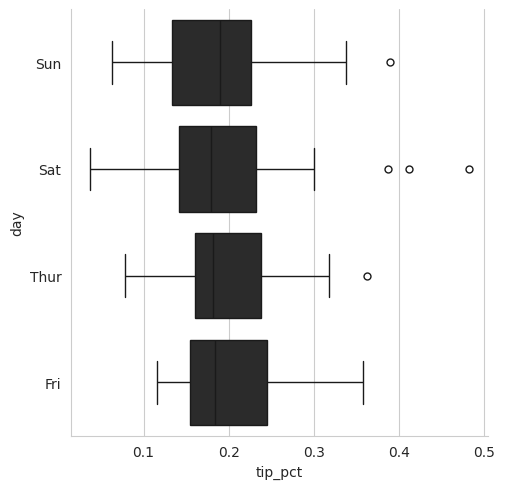

In [69]:
sns.catplot(x="tip_pct", y="day", kind="box", data=tips[tips.tip_pct < 0.5])

In [70]:
#You can create your own facet grid plots using the more general seaborn.FacetGrid
#class. See the seaborn documentation for more.